In [ ]:
!pip install ydata-profiling
!pip install --upgrade Pillow

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os as os

Read dataset

In [ ]:
# Step 1: Data Preparation

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("CARES_data_cleaned.csv")

# Display the first few rows of the dataframe
df.head()

,Indexno,Age,Gender,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,...,Anemiacategorybinned_Moderate/Severe,Anemiacategorybinned_NA,RDW15.7_<= 15.7,RDW15.7_>15.7,RDW15.7_NA,ASAcategorybinned_I,ASAcategorybinned_II,ASAcategorybinned_III,ASAcategorybinned_IV-VI,ASAcategorybinned_NA
0,2,48.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,False,False,True,True,False,False,False,False
1,5,36.0,Female,NaN,NaN,NaN,NaN,NaN,False,0.0,...,False,True,True,False,False,True,False,False,False,False
2,6,64.0,Female,NaN,Mild,152.538570,G1,NaN,False,0.0,...,False,False,True,False,False,True,False,False,False,False
3,9,73.0,Male,NaN,Moderate,117.231496,G1,NaN,False,0.0,...,True,False,True,False,False,True,False,False,False,False
4,10,73.0,Male,0.0,Mild,98.651255,G1,59.0,False,0.0,...,False,False,False,True,False,False,True,False,False,False


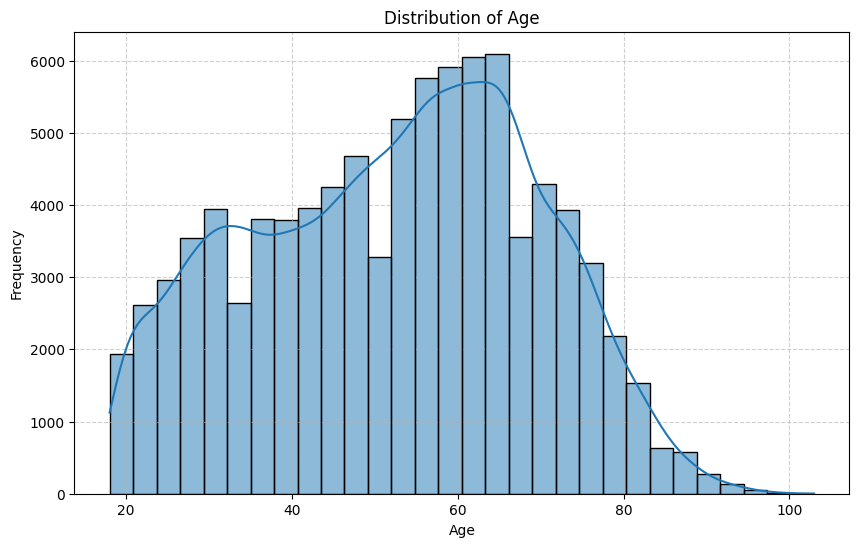

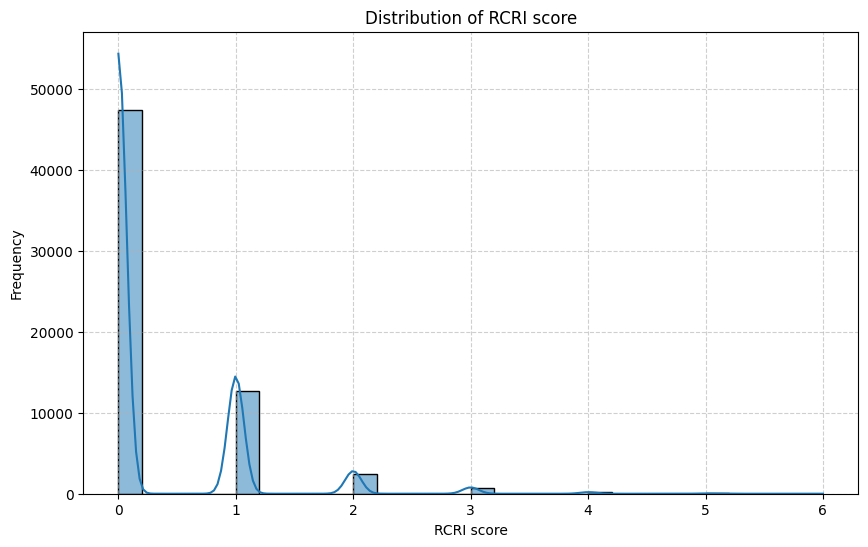

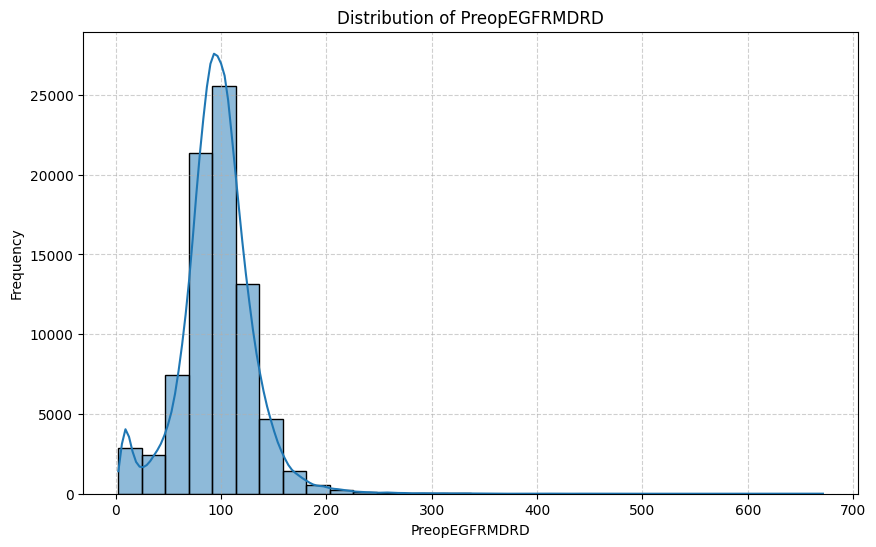

Pearson Correlation between Age and RCRI score:
Correlation Coefficient: 0.23983068944443753
P-value: 0.0



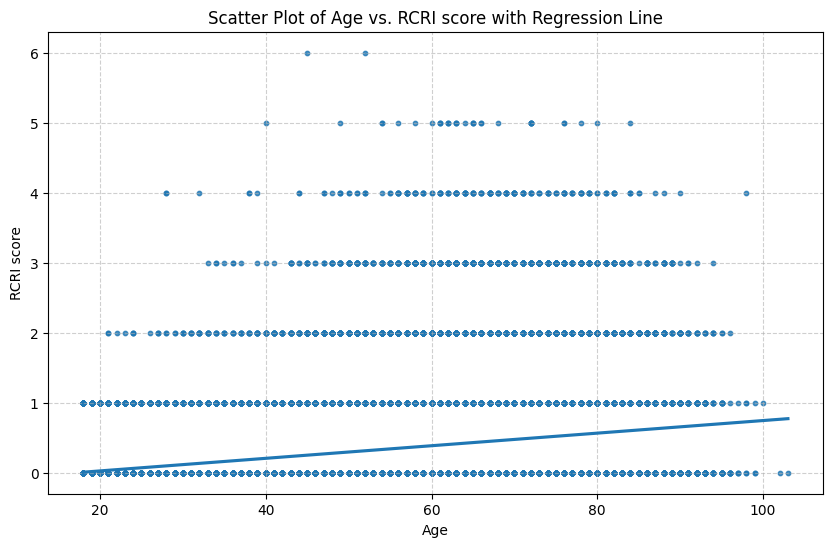

Pearson Correlation between Age and PreopEGFRMDRD:
Correlation Coefficient: -0.39118761643110056
P-value: 0.0



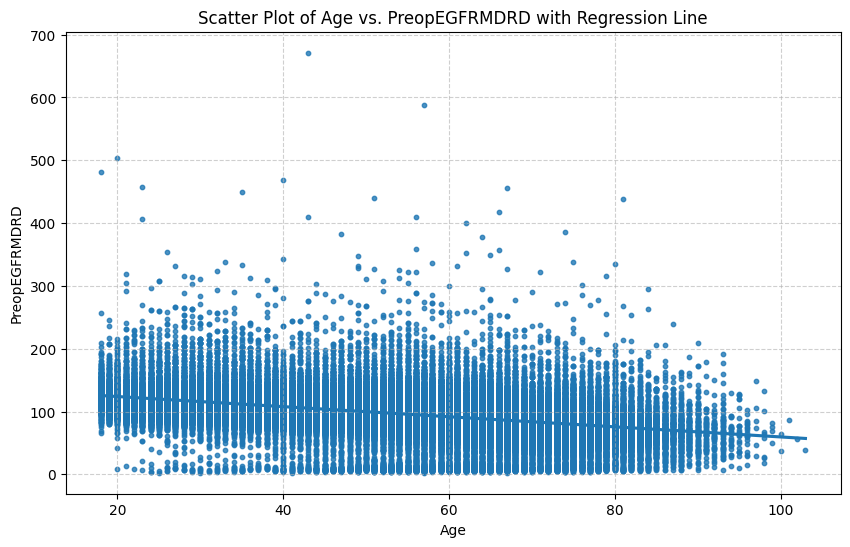

In [ ]:
# Step 2: Univariate Analysis
# Continuous Variables
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Continuous columns
continuous_columns = ['Age', 'RCRI score', 'PreopEGFRMDRD']

# Plot distributions
for col in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Correlation analysis
for col in continuous_columns:
    if col != 'Age':
        df_filtered = df.dropna(subset=['Age', col])
        corr_coefficient, p_value = pearsonr(df_filtered['Age'], df_filtered[col])
        print(f"Pearson Correlation between Age and {col}:")
        print(f"Correlation Coefficient: {corr_coefficient}")
        print(f"P-value: {p_value}\n")
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Age', y=col, data=df_filtered, scatter_kws={'s': 10})
        plt.title(f'Scatter Plot of Age vs. {col} with Regression Line')
        plt.xlabel('Age')
        plt.ylabel(col)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


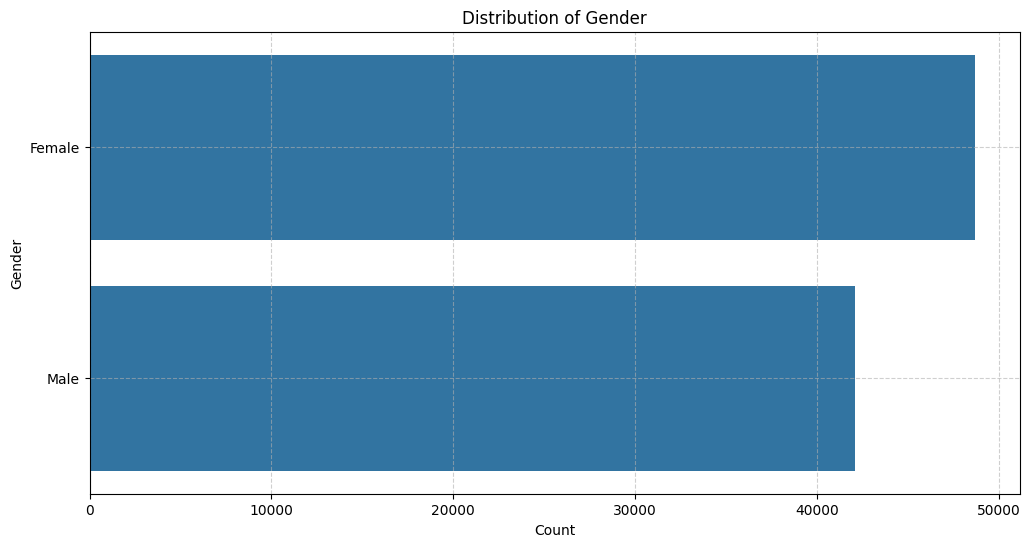

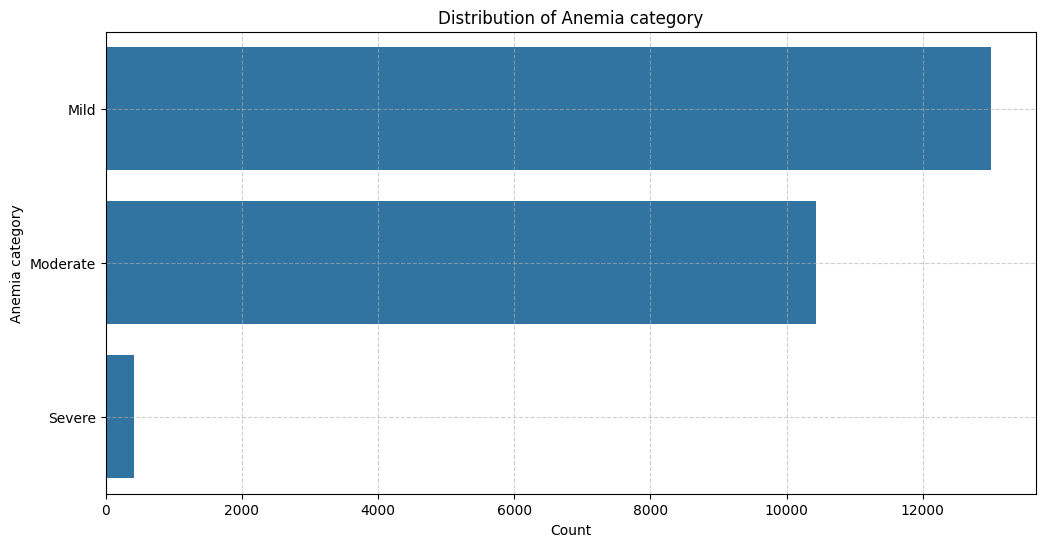

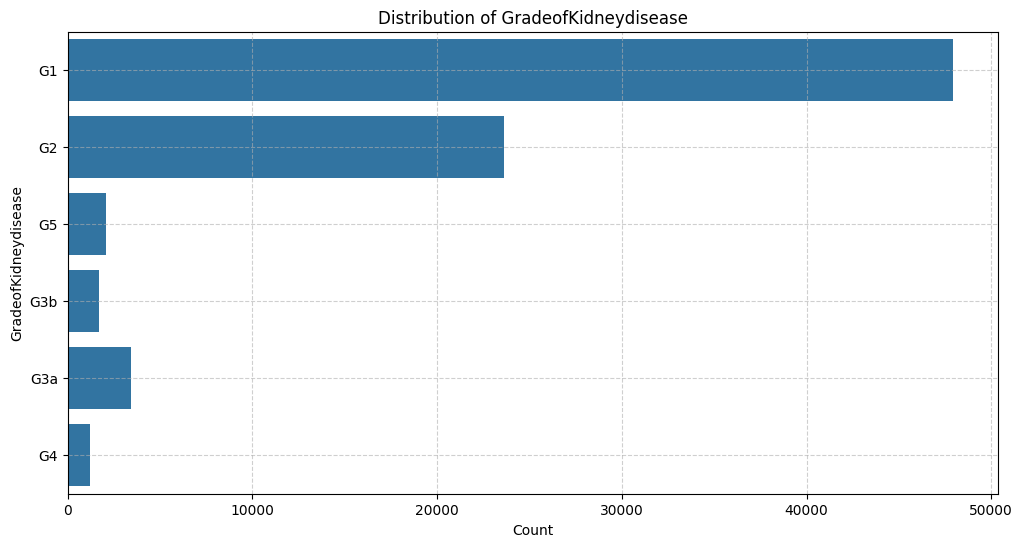

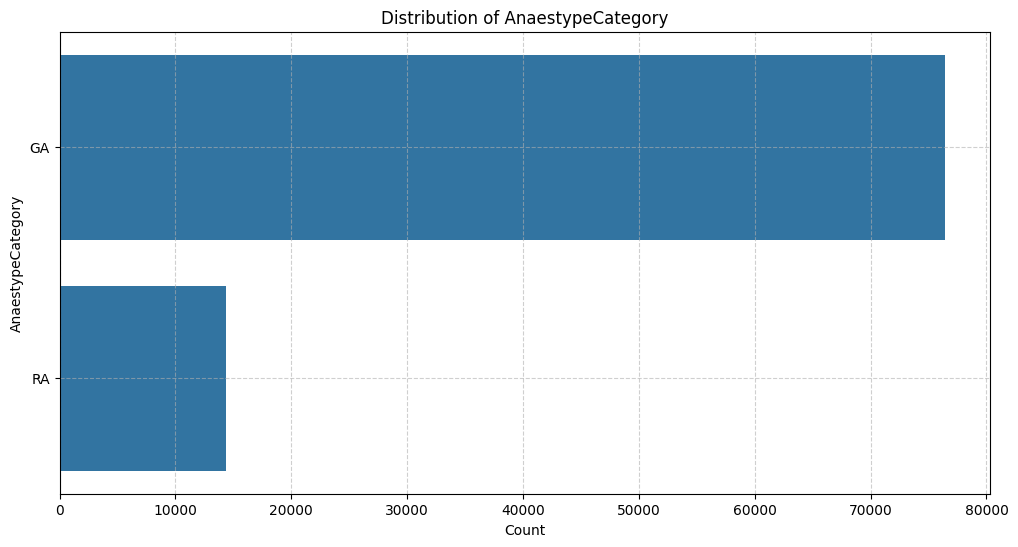

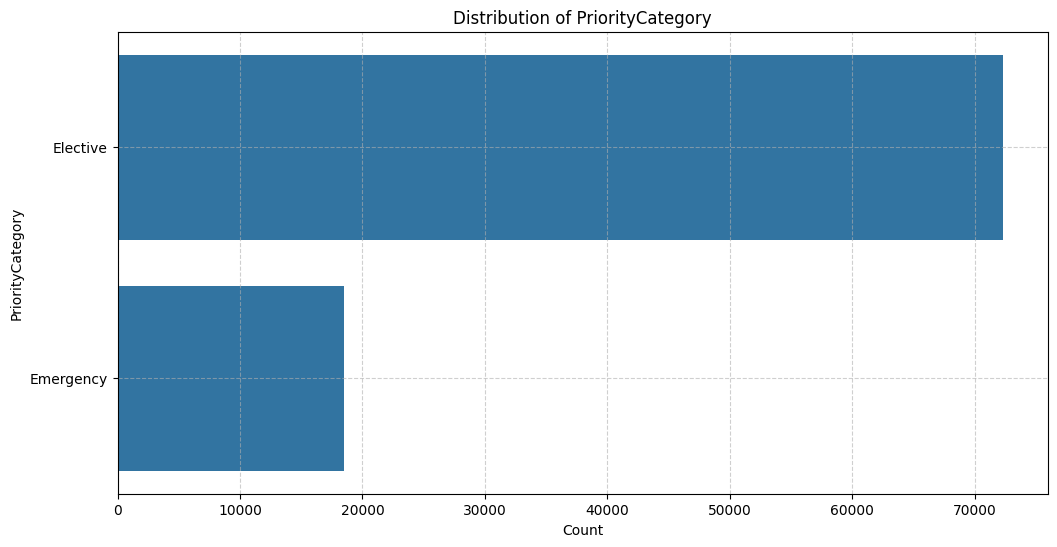

In [ ]:
# Categorical columns
categorical_columns = ['Gender', 'Anemia category', 'GradeofKidneydisease', 'AnaestypeCategory', 'PriorityCategory']

# Plot distributions
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


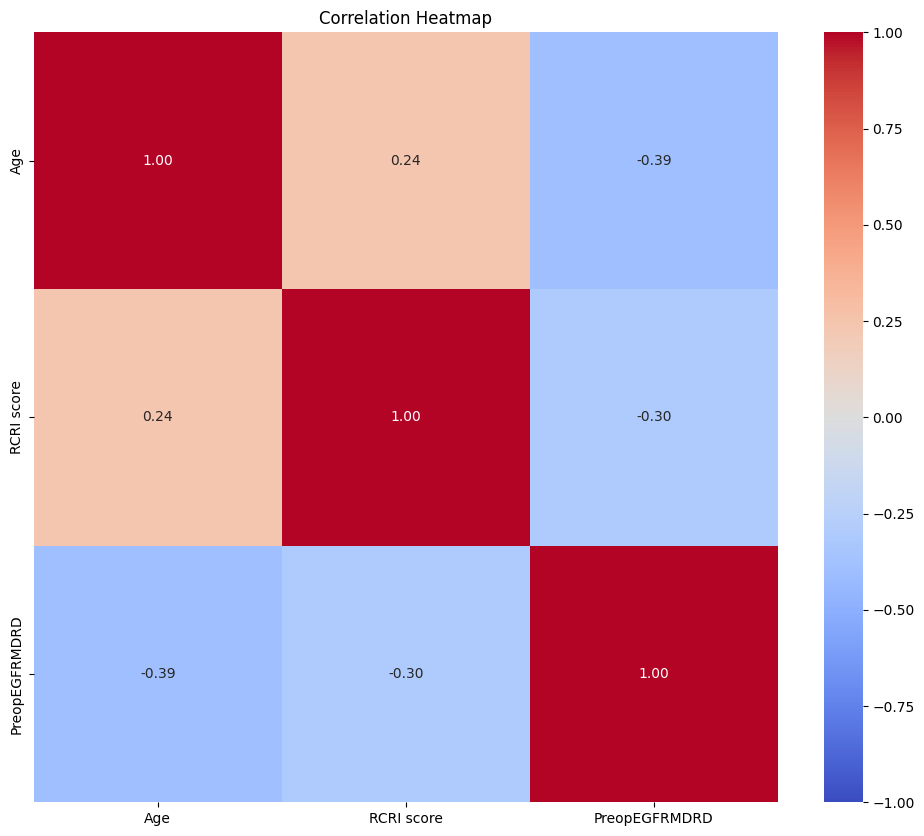

In [ ]:
# Step 3: Multivariate Analysis
# Correlation Heatmap for Numerical Features

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[continuous_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
""" uncomment if needed
# Step 4: Model Development
# Split Data into Training and Testing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("CARES_data_cleaned.csv")

# Drop columns that are not necessary for prediction
df.drop(['Indexno'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# List of outcome variables
outcome_vars = ['DaysbetweenDeathandoperation', '@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']
"""

' uncomment if needed\n# Step 4: Model Development\n# Split Data into Training and Testing \nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\n# Load the dataset\ndf = pd.read_csv("CARES_data_cleaned.csv")\n\n# Drop columns that are not necessary for prediction\ndf.drop([\'Indexno\'], axis=1, inplace=True)\n\n# Convert categorical variables to dummy variables\ndf = pd.get_dummies(df, drop_first=True)\n\n# List of outcome variables\noutcome_vars = [\'DaysbetweenDeathandoperation\', \'@30daymortality\', \'Mortality\', \'thirtydaymortality\', \'ICUAdmgt24h\']\n'

In [ ]:
""" uncomment if needed
# Function to Train and Evaluate Models

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# In the train_and_evaluate_model function, hyperparameter tuning is performed using GridSearchCV.
# This process is part of the model improvement step, ensuring that the best hyperparameters are chosen for each model.
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(X, y, model_type='classification'):
    # Handle NaN values in the outcome variable
    if model_type == 'classification':
        # Drop rows where y is NaN
        X = X.loc[~y.isna()]
        y = y.dropna()
    elif model_type == 'regression':
        # Impute NaN values in y
        imputer_y = SimpleImputer(strategy='mean')
        y = pd.Series(imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel())

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select the model type
    if model_type == 'classification':
        model = LogisticRegression(max_iter=1000)
        param_grid = {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__solver': ['lbfgs', 'liblinear']
        }
    elif model_type == 'regression':
        model = LinearRegression()
        param_grid = {}  # No hyperparameters for LinearRegression in this example
    else:
        raise ValueError("Invalid model_type. Choose 'classification' or 'regression'")

    # Define the pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc' if model_type == 'classification' else 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    if model_type == 'classification':
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"Best Model Accuracy: {accuracy:.4f}")
        print(f"Best Model ROC AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
    elif model_type == 'regression':
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"Best Model RMSE: {rmse:.4f}")
        print(f"Best Model Mean Squared Error: {mse:.4f}")

    return best_model
"""

' uncomment if needed\n# Function to Train and Evaluate Models\n\nfrom sklearn.linear_model import LogisticRegression, LinearRegression\nfrom sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_squared_error\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\n# In the train_and_evaluate_model function, hyperparameter tuning is performed using GridSearchCV. \n# This process is part of the model improvement step, ensuring that the best hyperparameters are chosen for each model.\nfrom sklearn.model_selection import GridSearchCV\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef train_and_evaluate_model(X, y, model_type=\'classification\'):\n    # Handle NaN values in the outcome variable\n    if model_type == \'classification\':\n        # Drop rows where y is NaN\n        X = X.loc[~y.isna()]\n        y = y.dropna()\n    elif model_type == \'regressi

In [ ]:
""" uncomment if needed
# Train and Evaluate Models for Each Outcome Variable
# Separate predictors and outcomes

X = df.drop(columns=outcome_vars)
y_dict = {var: df[var] for var in outcome_vars}

# Train and evaluate models for each outcome variable
models = {}
for outcome_var, y in y_dict.items():
    print(f"\nTraining model for {outcome_var}...")
    if y.nunique() > 2:  # Assume regression if more than 2 unique values
        model_type = 'regression'
    else:
        model_type = 'classification'
    model = train_and_evaluate_model(X, y, model_type=model_type)
    models[outcome_var] = model
"""


' uncomment if needed\n# Train and Evaluate Models for Each Outcome Variable\n# Separate predictors and outcomes\n\nX = df.drop(columns=outcome_vars)\ny_dict = {var: df[var] for var in outcome_vars}\n\n# Train and evaluate models for each outcome variable\nmodels = {}\nfor outcome_var, y in y_dict.items():\n    print(f"\nTraining model for {outcome_var}...")\n    if y.nunique() > 2:  # Assume regression if more than 2 unique values\n        model_type = \'regression\'\n    else:\n        model_type = \'classification\'\n    model = train_and_evaluate_model(X, y, model_type=model_type)\n    models[outcome_var] = model\n'

In [ ]:
""" uncomment if needed
# Step 5: Model Interpretation
# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:

# Example for logistic regression feature importance
for outcome_var, model in models.items():
    if isinstance(model.named_steps['model'], LogisticRegression):
        importance = model.named_steps['model'].coef_[0]
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance for Logistic Regression - {outcome_var}')
        plt.show()
"""

" uncomment if needed\n# Step 6: Model Interpretation\n# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:\n\n# Example for logistic regression feature importance\nfor outcome_var, model in models.items():\n    if isinstance(model.named_steps['model'], LogisticRegression):\n        importance = model.named_steps['model'].coef_[0]\n        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})\n        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)\n\n        plt.figure(figsize=(12, 8))\n        sns.barplot(x='Importance', y='Feature', data=feature_importance)\n        plt.title(f'Feature Importance for Logistic Regression - {outcome_var}')\n        plt.show()\n"

In [ ]:
""" uncomment if needed
# Step 6: Handle Imbalanced Data (If Necessary)
# If any of the outcome variables are highly imbalanced, we can use techniques like SMOTE for oversampling the minority class.
# This can be incorporated into the train_and_evaluate_model function for classification models.

from imblearn.over_sampling import SMOTE
from collections import Counter

def train_and_evaluate_model(X, y, model_type='classification'):
    # Handle NaN values in the outcome variable
    if model_type == 'classification':
        # Drop rows where y is NaN
        X = X.loc[~y.isna()]
        y = y.dropna()

        # Handle imbalanced data
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)
    elif model_type == 'regression':
        # Impute NaN values in y
        imputer_y = SimpleImputer(strategy='mean')
        y = pd.Series(imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel())

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select the model type
    if model_type == 'classification':
        model = LogisticRegression(max_iter=1000)
        param_grid = {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__solver': ['lbfgs', 'liblinear']
        }
    elif model_type == 'regression':
        model = LinearRegression()
        param_grid = {}  # No hyperparameters for LinearRegression in this example
    else:
        raise ValueError("Invalid model_type. Choose 'classification' or 'regression'")

    # Define the pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc' if model_type == 'classification' else 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    if model_type == 'classification':
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"Best Model Accuracy: {accuracy:.4f}")
        print(f"Best Model ROC AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
    elif model_type == 'regression':
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"Best Model RMSE: {rmse:.4f}")
        print(f"Best Model Mean Squared Error: {mse:.4f}")

    return best_model
"""

' uncomment if needed\n# Step 7: Handle Imbalanced Data (If Necessary)\n# If any of the outcome variables are highly imbalanced, you can use techniques like SMOTE for oversampling the minority class. \n# This can be incorporated into the train_and_evaluate_model function for classification models.\n\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\ndef train_and_evaluate_model(X, y, model_type=\'classification\'):\n    # Handle NaN values in the outcome variable\n    if model_type == \'classification\':\n        # Drop rows where y is NaN\n        X = X.loc[~y.isna()]\n        y = y.dropna()\n        \n        # Handle imbalanced data\n        smote = SMOTE(random_state=42)\n        X, y = smote.fit_resample(X, y)\n    elif model_type == \'regression\':\n        # Impute NaN values in y\n        imputer_y = SimpleImputer(strategy=\'mean\')\n        y = pd.Series(imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel())\n    \n    # Split the data into traini

In [ ]:
""" uncomment if needed

# Check the distribution of each classification outcome variable
for outcome_var in ['@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']:
    print(f"Distribution of {outcome_var}:")
    print(df[outcome_var].value_counts(normalize=True))
    print("\n")
"""

' uncomment if needed\n\n# Check the distribution of each classification outcome variable\nfor outcome_var in [\'@30daymortality\', \'Mortality\', \'thirtydaymortality\', \'ICUAdmgt24h\']:\n    print(f"Distribution of {outcome_var}:")\n    print(df[outcome_var].value_counts(normalize=True))\n    print("\n")\n'

In [ ]:
# Step 4: Model Development
# Split Data into Training and Testing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import chi2


# Load the dataset
df = pd.read_csv("CARES_data_cleaned.csv")

# Drop columns that are not necessary for prediction
df.drop(['Indexno'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# List of outcome variables
outcome_vars = ['DaysbetweenDeathandoperation', '@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']

# Function to Train and Evaluate Model
def train_and_evaluate_model(X, y, model_type='classification'):
    # Handle NaN values in the outcome variable
    if model_type == 'classification':
        # Drop rows where y is NaN
        X = X.loc[~y.isna()]
        y = y.dropna()

        # Handle missing values in X
        imputer = SimpleImputer(strategy='mean')
        X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

        # Handle imbalanced data
        if y.value_counts(normalize=True).min() < 0.1:  # Threshold for imbalance, can be adjusted
            print(f"Before SMOTE: {Counter(y)}")
            smote = SMOTE(random_state=42)
            X, y = smote.fit_resample(X, y)
            print(f"After SMOTE: {Counter(y)}")

    elif model_type == 'regression':
        # Impute NaN values in y
        imputer_y = SimpleImputer(strategy='mean')
        y = pd.Series(imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel())

        # Handle missing values in X
        imputer = SimpleImputer(strategy='mean')
        X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select the model type
    if model_type == 'classification':
        model = LogisticRegression(max_iter=1000)
        param_grid = {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__solver': ['lbfgs', 'liblinear']
        }
    elif model_type == 'regression':
        model = LinearRegression()
        param_grid = {}  # No hyperparameters for LinearRegression in this example
    else:
        raise ValueError("Invalid model_type. Choose 'classification' or 'regression'")

    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc' if model_type == 'classification' else 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    if model_type == 'classification':
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"Best Model Accuracy: {accuracy:.4f}")
        print(f"Best Model ROC AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    elif model_type == 'regression':
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"Best Model RMSE: {rmse:.4f}")
        print(f"Best Model Mean Squared Error: {mse:.4f}")

    return best_model


Training model for DaysbetweenDeathandoperation...
Best Model RMSE: 104.3990
Best Model Mean Squared Error: 10899.1556

Training model for @30daymortality...
Before SMOTE: Counter({False: 90246, True: 539})
After SMOTE: Counter({False: 90246, True: 90246})
Best Model Accuracy: 0.9031
Best Model ROC AUC: 0.9607

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.89      0.90     17943
        True       0.90      0.91      0.90     18156

    accuracy                           0.90     36099
   macro avg       0.90      0.90      0.90     36099
weighted avg       0.90      0.90      0.90     36099


Confusion Matrix:
[[16055  1888]
 [ 1611 16545]]


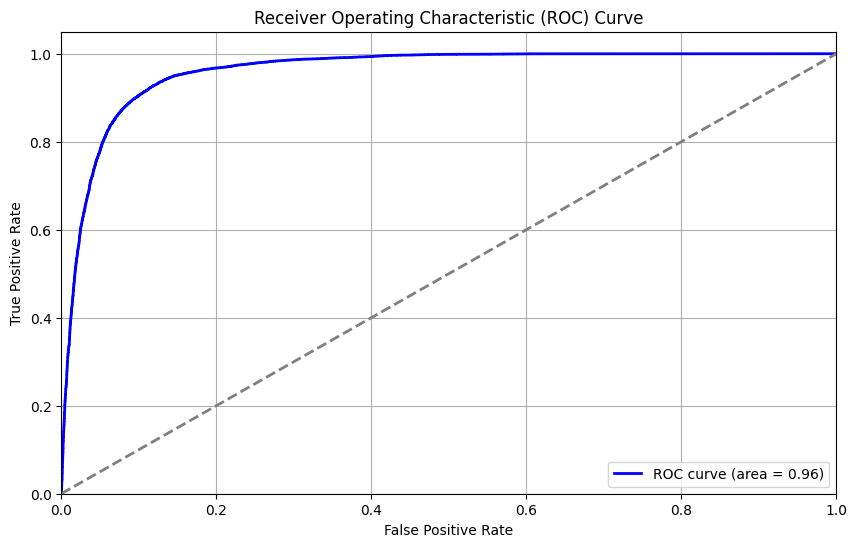


Training model for Mortality...
Before SMOTE: Counter({False: 85190, True: 5595})
After SMOTE: Counter({False: 85190, True: 85190})
Best Model Accuracy: 0.8041
Best Model ROC AUC: 0.8810

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.82      0.81     16882
        True       0.82      0.79      0.80     17194

    accuracy                           0.80     34076
   macro avg       0.80      0.80      0.80     34076
weighted avg       0.80      0.80      0.80     34076


Confusion Matrix:
[[13800  3082]
 [ 3593 13601]]


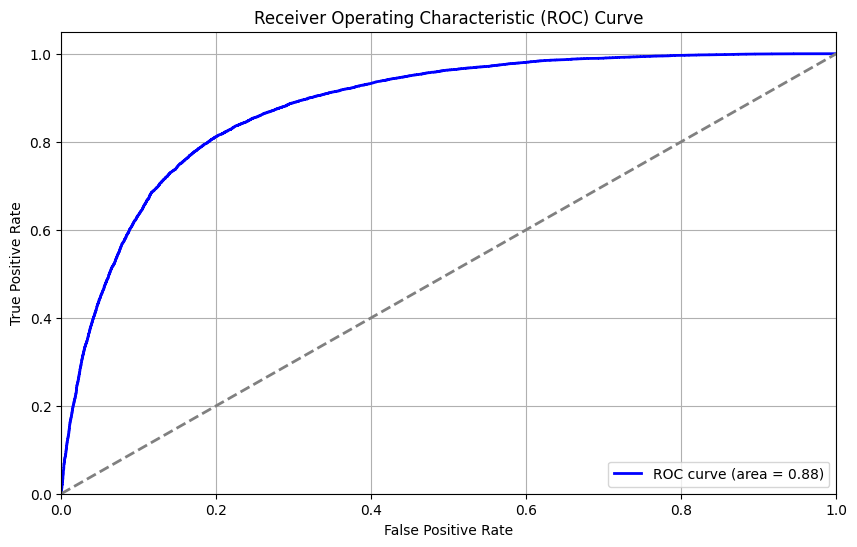


Training model for thirtydaymortality...
Before SMOTE: Counter({False: 90246, True: 539})
After SMOTE: Counter({False: 90246, True: 90246})
Best Model Accuracy: 0.9031
Best Model ROC AUC: 0.9607

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.89      0.90     17943
        True       0.90      0.91      0.90     18156

    accuracy                           0.90     36099
   macro avg       0.90      0.90      0.90     36099
weighted avg       0.90      0.90      0.90     36099


Confusion Matrix:
[[16055  1888]
 [ 1611 16545]]


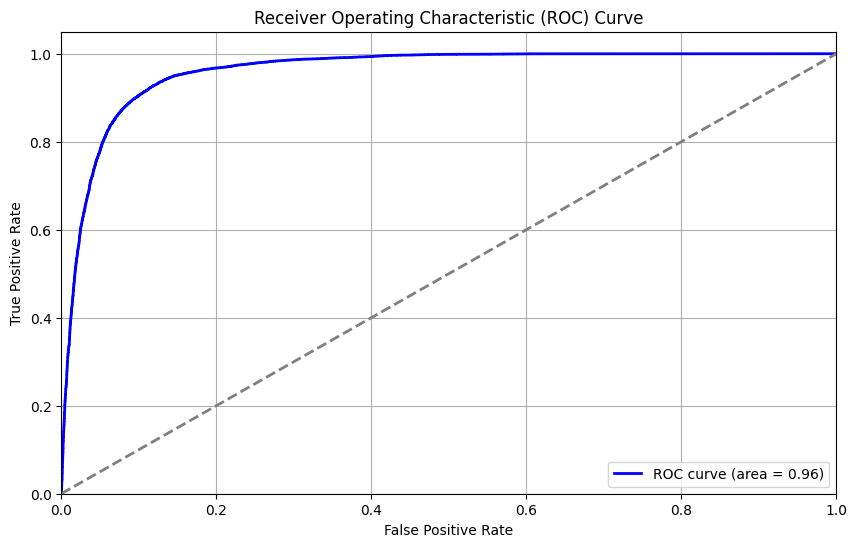


Training model for ICUAdmgt24h...
Before SMOTE: Counter({False: 89521, True: 1264})
After SMOTE: Counter({False: 89521, True: 89521})
Best Model Accuracy: 0.8634
Best Model ROC AUC: 0.9362

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.88      0.86     17893
        True       0.87      0.85      0.86     17916

    accuracy                           0.86     35809
   macro avg       0.86      0.86      0.86     35809
weighted avg       0.86      0.86      0.86     35809


Confusion Matrix:
[[15668  2225]
 [ 2668 15248]]


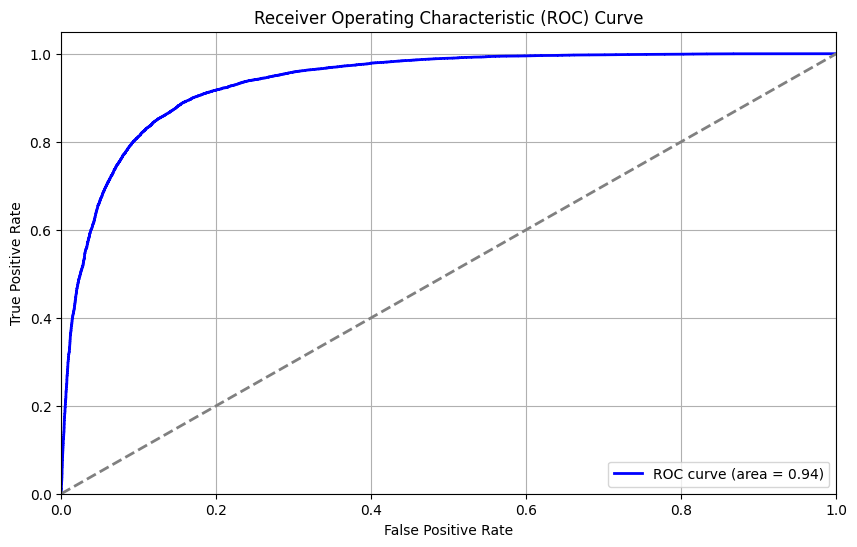

In [ ]:
# Step 5: Model Interpretation
# Separate predictors and outcomes
# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:

X = df.drop(columns=outcome_vars)
y_dict = {var: df[var] for var in outcome_vars}

# Train and evaluate models for each outcome variable
models = {}
for outcome_var, y in y_dict.items():
    print(f"\nTraining model for {outcome_var}...")
    if y.nunique() > 2:  # Assume regression if more than 2 unique values
        model_type = 'regression'
    else:
        model_type = 'classification'
    model = train_and_evaluate_model(X, y, model_type=model_type)
    models[outcome_var] = model

In [ ]:
"""old

# Step 6: Model Interpretation
# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:

# Example for logistic regression feature importance
for outcome_var, model in models.items():
    if isinstance(model.named_steps['model'], LogisticRegression):
        importance = model.named_steps['model'].coef_[0]
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance for Logistic Regression - {outcome_var}')
        plt.show()
"""

"old\n\n# Step 6: Model Interpretation\n# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:\n\n# Example for logistic regression feature importance\nfor outcome_var, model in models.items():\n    if isinstance(model.named_steps['model'], LogisticRegression):\n        importance = model.named_steps['model'].coef_[0]\n        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})\n        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)\n\n        plt.figure(figsize=(12, 8))\n        sns.barplot(x='Importance', y='Feature', data=feature_importance)\n        plt.title(f'Feature Importance for Logistic Regression - {outcome_var}')\n        plt.show()\n"

In [ ]:
"""old
# Step 7

# Check the distribution of each classification outcome variable
for outcome_var in ['@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']:
    print(f"Distribution of {outcome_var}:")
    print(df[outcome_var].value_counts(normalize=True))
    print("\n")
"""

'old\n# Step 7\n\n# Check the distribution of each classification outcome variable\nfor outcome_var in [\'@30daymortality\', \'Mortality\', \'thirtydaymortality\', \'ICUAdmgt24h\']:\n    print(f"Distribution of {outcome_var}:")\n    print(df[outcome_var].value_counts(normalize=True))\n    print("\n")\n'

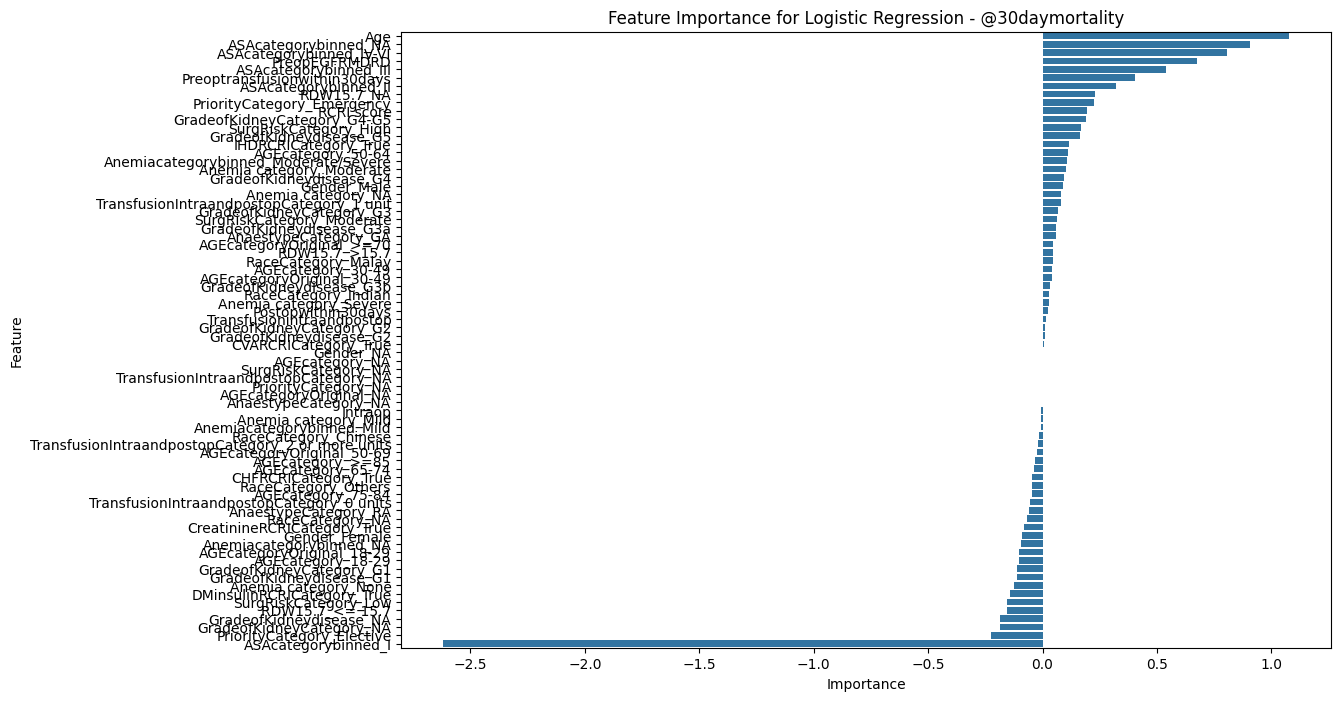

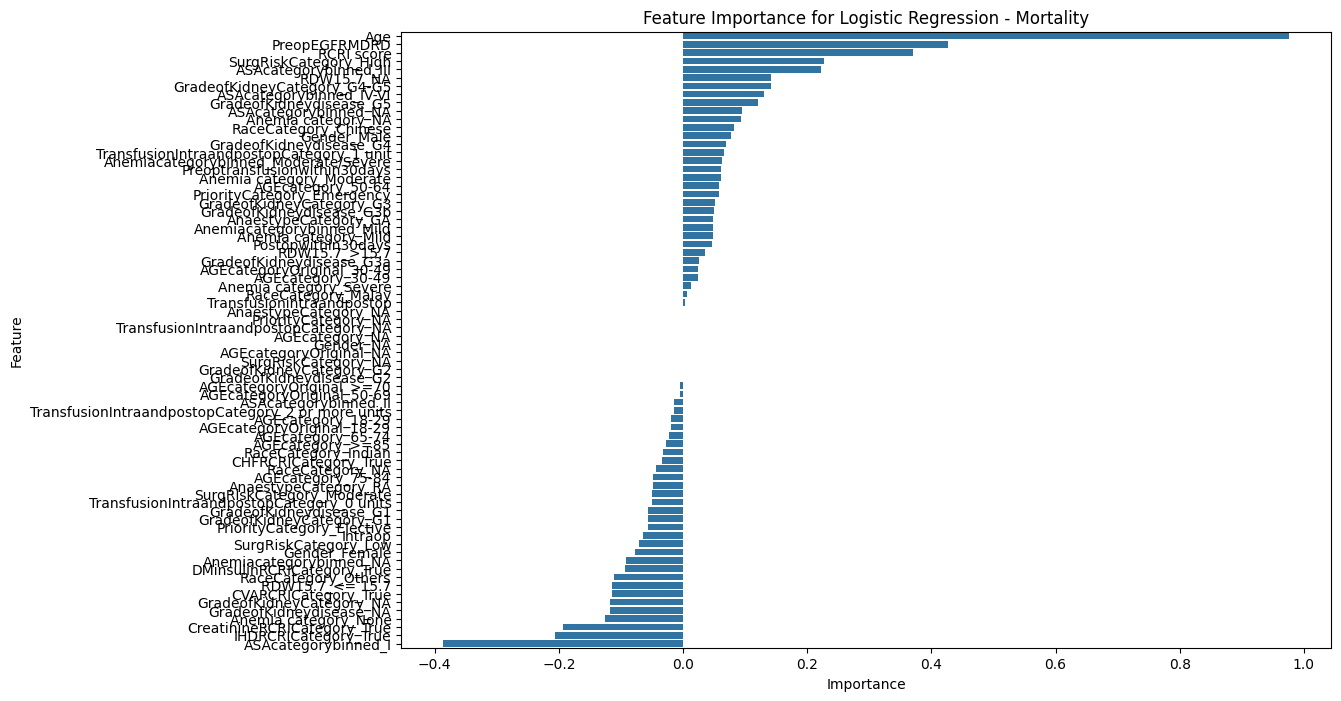

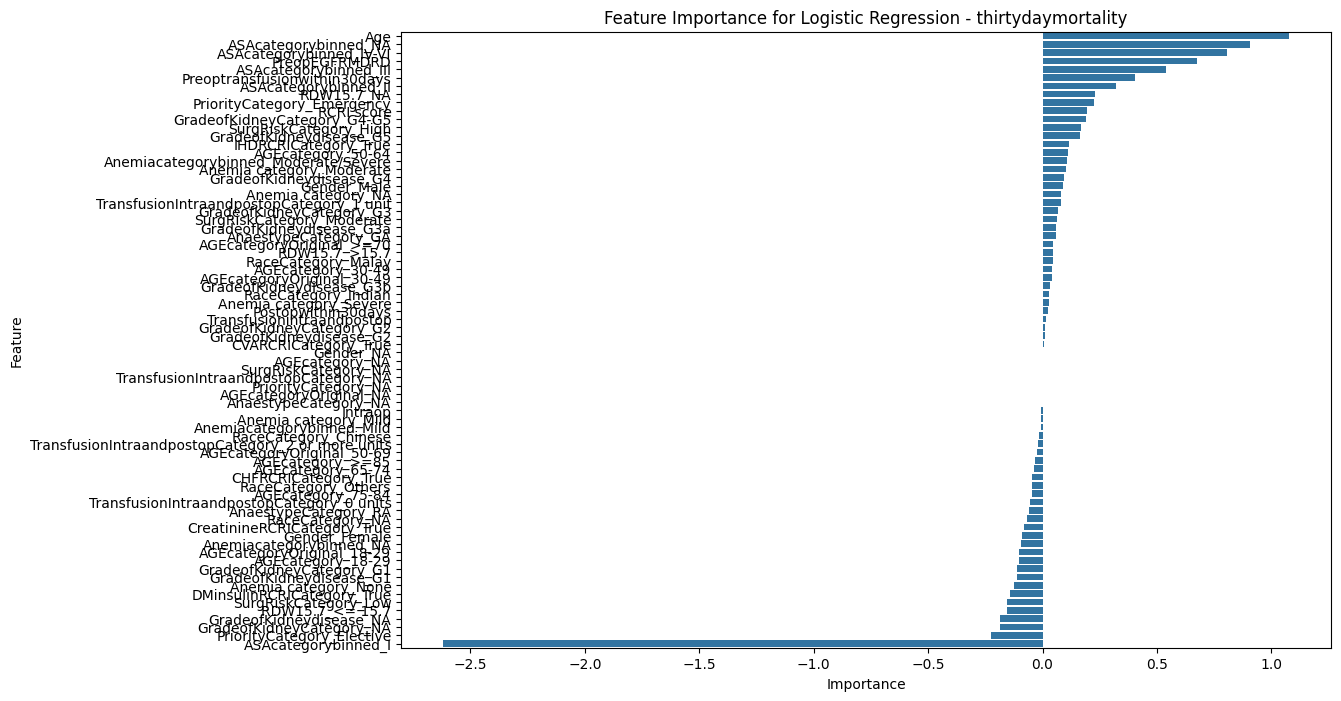

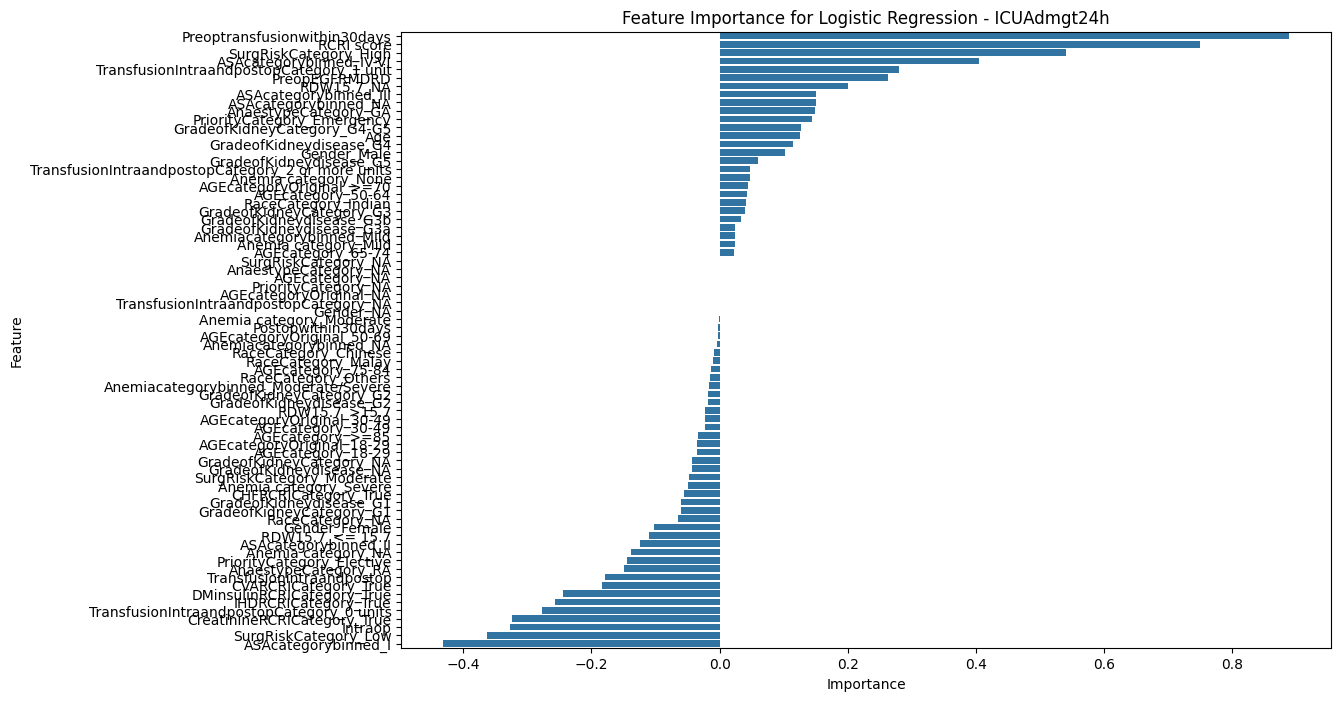

In [ ]:
# Step 6: Model Interpretation
# Use feature importance and other techniques to interpret each model. Here's an example for logistic regression:

# Example for logistic regression feature importance
for outcome_var, model in models.items():
    if isinstance(model.named_steps['model'], LogisticRegression):
        importance = model.named_steps['model'].coef_[0]
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance for Logistic Regression - {outcome_var}')
        plt.show()

In [ ]:
# Step 7

# Check the distribution of each classification outcome variable
for outcome_var in ['@30daymortality', 'Mortality', 'thirtydaymortality', 'ICUAdmgt24h']:
    print(f"Distribution of {outcome_var}:")
    print(df[outcome_var].value_counts(normalize=True))
    print("\n")
#"""

Distribution of @30daymortality:
@30daymortality
False    0.994063
True     0.005937
Name: proportion, dtype: float64


Distribution of Mortality:
Mortality
False    0.938371
True     0.061629
Name: proportion, dtype: float64


Distribution of thirtydaymortality:
thirtydaymortality
False    0.994063
True     0.005937
Name: proportion, dtype: float64


Distribution of ICUAdmgt24h:
ICUAdmgt24h
False    0.986077
True     0.013923
Name: proportion, dtype: float64


